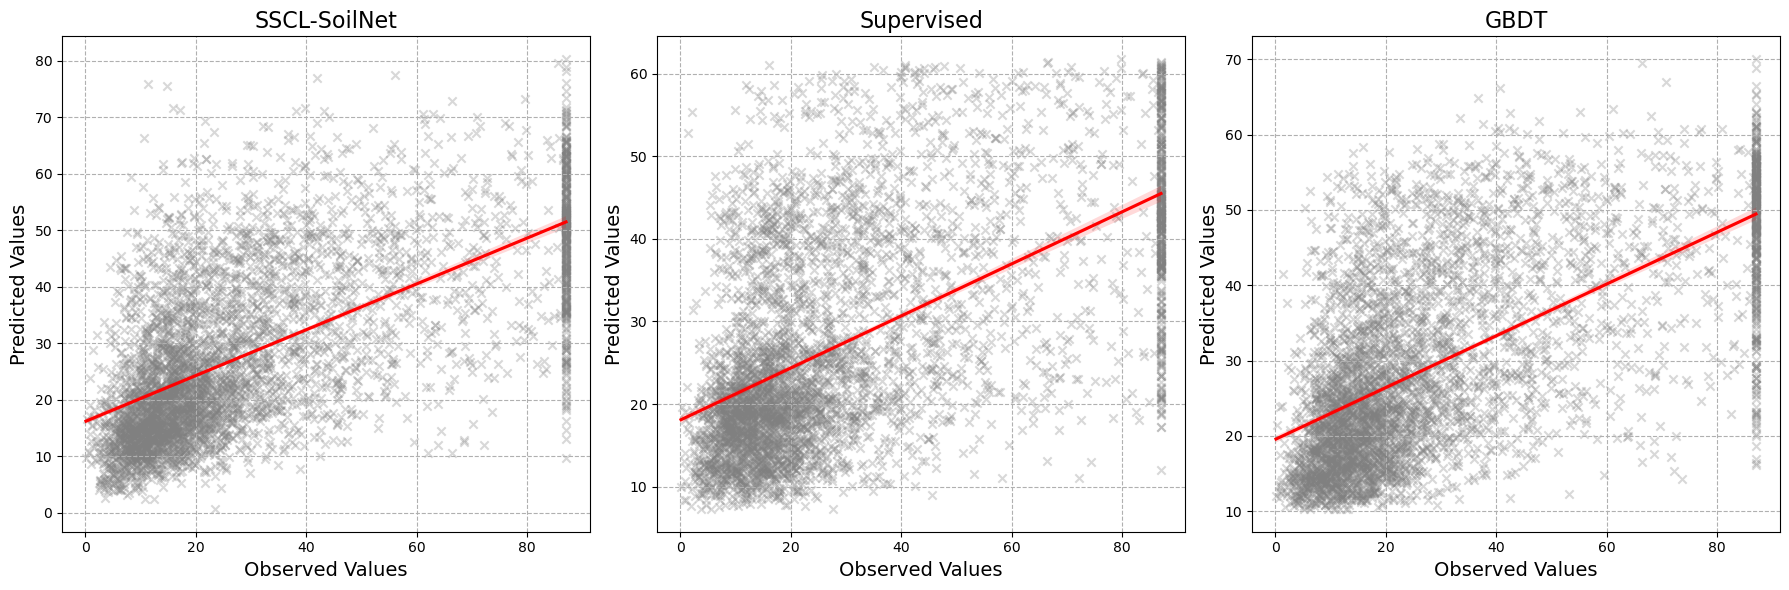

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_regression_multi(csv_file_paths, column_names, norm_value, output_file):
    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Iterate over each CSV file and corresponding column names
    for i, (csv_file_path, (y_real_column, y_pred_column)) in enumerate(zip(csv_file_paths, column_names)):
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file_path)
                

        if i == 2:
            y_real = df[y_real_column]
            y_pred = df[y_pred_column]
        else:
            y_real = df[y_real_column]*norm_value
            y_pred = df[y_pred_column]*norm_value
        

        sns.regplot(x=y_real, y=y_pred, scatter_kws={'alpha':0.3, 'color' : 'gray'},
                 marker = 'x', line_kws={'color': 'red'}, ax=axes[i])
        
        axes[i].set_xlabel('Observed Values', fontsize=14)
        axes[i].set_ylabel('Predicted Values', fontsize=14)


        if i == 0:
          axes[i].set_title('SSCL-SoilNet' , fontsize=16)

        if i == 1: 
           axes[i].set_title('Supervised' , fontsize=16)

        if i == 2 and norm_value == 87: 
           axes[i].set_title('GBDT', fontsize=16)

        if i == 2 and norm_value == 4115: 
           axes[i].set_title('RF', fontsize=16)

        
        # Set grid lines to dashed
        axes[i].grid(True, linestyle='--')
    
    plt.tight_layout()
    plt.savefig(output_file, format='pdf')  # Save the figure as a PDF
    plt.show()

# Example usage:
csv_file_paths = ["C:\\Users\\nkakhani\\_Multimodal\\SoilNet-7\\SoilNet-PreRelease\\results\\RUN_LUCAS_Self_ViT_Trans_finetune_D_2024_02_27_T_08_32_Nafiseh_worst.csv",
                  "C:\\Users\\nkakhani\\_Multimodal\\SoilNet-7\\SoilNet-PreRelease\\results\\RUN_LUCAS_ViT_Trans_all_D_2024_02_14_T_18_23_Nafiseh_worst.csv",
                  "C:\\Users\\nkakhani\\_Multimodal\\SoilNet-7\\SoilNet-PreRelease\\results\ML_GBDT_LUCAS_D_2024_03_07_T_08_58_Nafiseh.csv"]

column_names = [("y_real", "y_pred"),
                ("y_real", "y_pred"),
                ("y_true", "y_pred")]

output_file = "Regplot_LUCAS.pdf"
plot_regression_multi(csv_file_paths, column_names, 87, output_file)



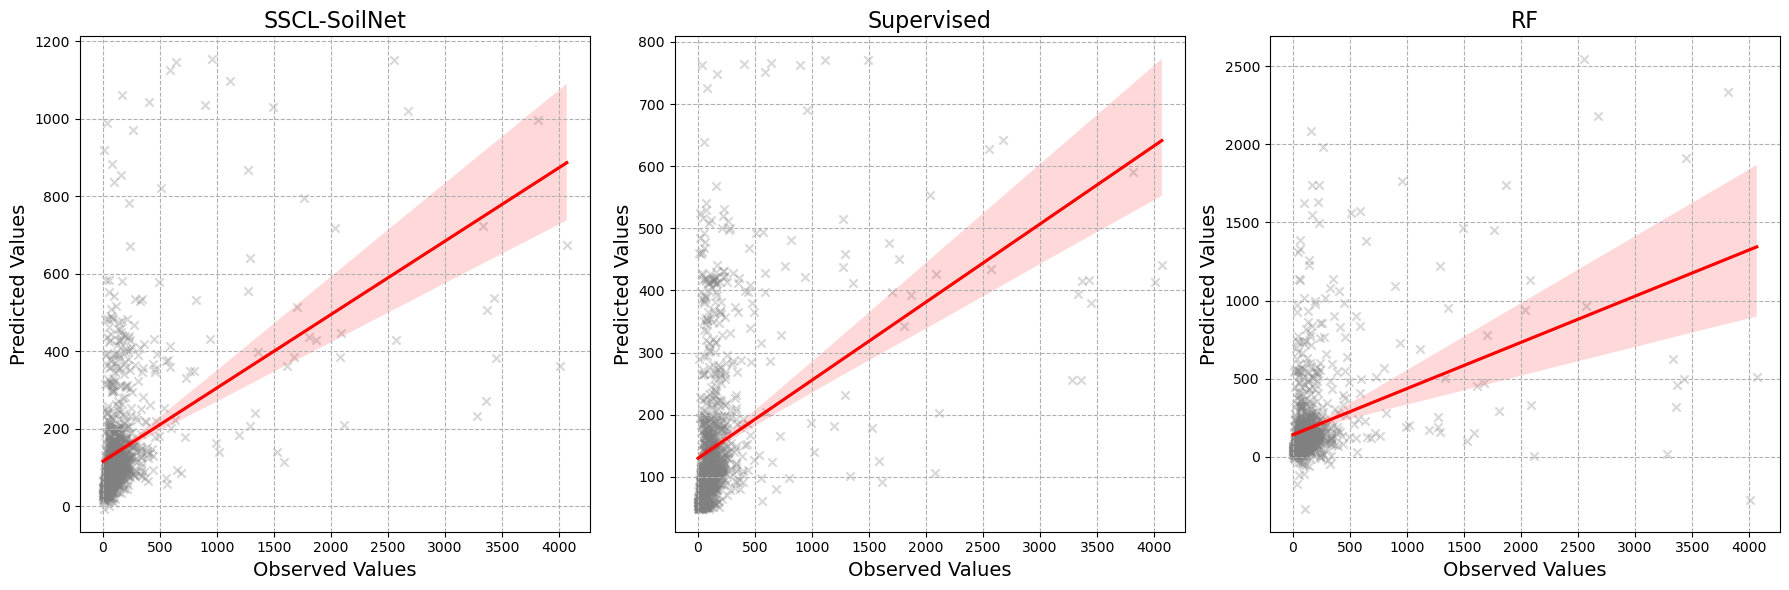

In [2]:
# Example usage:
csv_file_paths = [
                  "C:\\Users\\nkakhani\\_Multimodal\\SoilNet-7\\SoilNet-PreRelease\\results\\RUN_RaCA_Self_D_2024_02_09_T_17_27_Nafiseh_best.csv",
                  "C:\\Users\\nkakhani\\_Multimodal\\SoilNet-7\\SoilNet-PreRelease\\results\\RUN_RaCA_all_input_D_2024_02_07_T_09_00_Nafiseh_best.csv",
                  "C:\\Users\\nkakhani\\_Multimodal\\SoilNet-7\\SoilNet-PreRelease\\results\\RF_D_2024_03_04_T_10_29_Nafiseh.csv"]

column_names = [("y_real", "y_pred"),
                ("y_real", "y_pred"),
                ("y_true", "y_pred")]

output_file = "Regplot_RaCA.pdf"
plot_regression_multi(csv_file_paths, column_names, 4115, output_file)


